In [114]:
# Importing Packages
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [5]:
# Importing all the sources of Data
holidayEvents = pd.read_csv ('holidays_events.csv')
oil = pd.read_csv('oil.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
transactions = pd.read_csv('transactions.csv')

In [6]:
# Viewing the size of Data
print ("Training Data Shape: ", train.shape)
print ("Testing Data Shape: ", test.shape)

Training Data Shape:  (3000888, 6)
Testing Data Shape:  (28512, 5)


In [8]:
# Merging of data sources
train1 = train.merge(oil, on = 'date', how='left')
train1 = train1.merge(holidayEvents, on = 'date', how='left')
train1 = train1.merge(stores, on = 'store_nbr', how='left')
train1 = train1.merge(transactions, on = ['date', 'store_nbr'], how='left')
train1 = train1.rename(columns = {"type_x" : "holiday_type", 
                                  "type_y" : "store_type"})

test1 = test.merge(oil, on = 'date', how='left')
test1 = test1.merge(holidayEvents, on = 'date', how='left')
test1 = test1.merge(stores, on = 'store_nbr', how='left')
test1 = test1.merge(transactions, on = ['date', 'store_nbr'], how='left')
test1 = test1.rename(columns = {"type_x" : "holiday_type", 
                                "type_y" : "store_type"})



In [9]:
# Viewing the train data
train1 .head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN


In [10]:
# Checking for null values
train1.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico       955152
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
city                  0
state                 0
store_type            0
cluster               0
transactions     249117
dtype: int64

In [11]:
train1.shape

(3054348, 17)

Out of around 30L tuples, around 25L tuples have NULL values for a few colums

In [82]:
# Adding new features
def feature_eng(data):
    data['date'] = pd.to_datetime(data['date'])
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofyear'] = data['date'].dt.dayofyear
    data['dayofmonth'] = data['date'].dt.day
    return data
    
train1 = feature_eng(train1)

## Correlation between features

<AxesSubplot:>

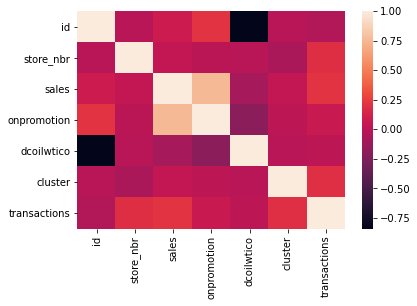

In [12]:
# Plotting a correlation graph for features
corr = train1.corr()
sns.heatmap(corr)

# Visualiazation

<AxesSubplot:xlabel='year', ylabel='sales'>

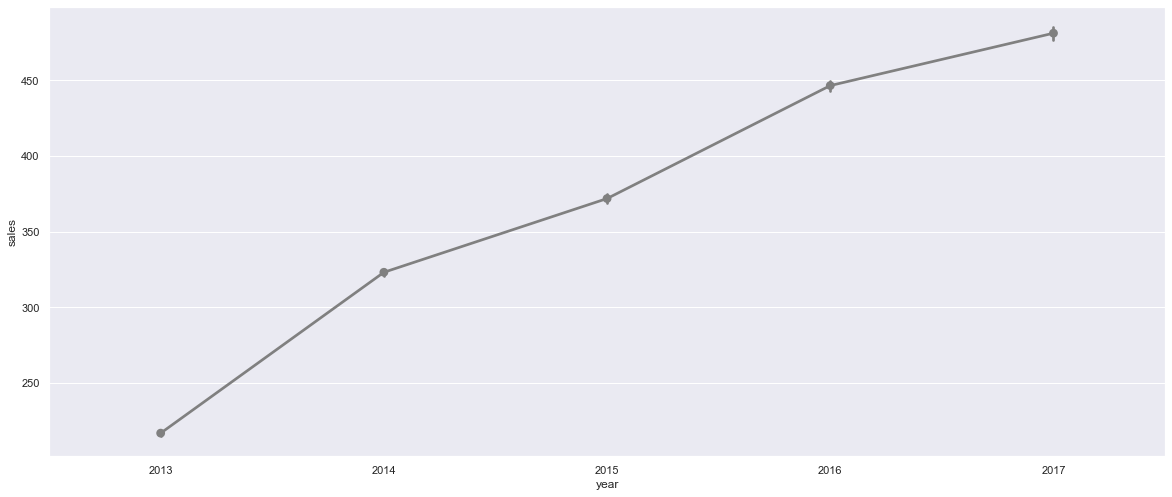

In [84]:
# Visualising the trend in total sales
sns.set(rc={'figure.figsize':(20,8.27)})
ax=sns.pointplot(x = 'year',y = 'sales',data = train1 ,color = "grey",)
ax

There has been an increase in total number of sales each year. 


<AxesSubplot:xlabel='month', ylabel='sales'>

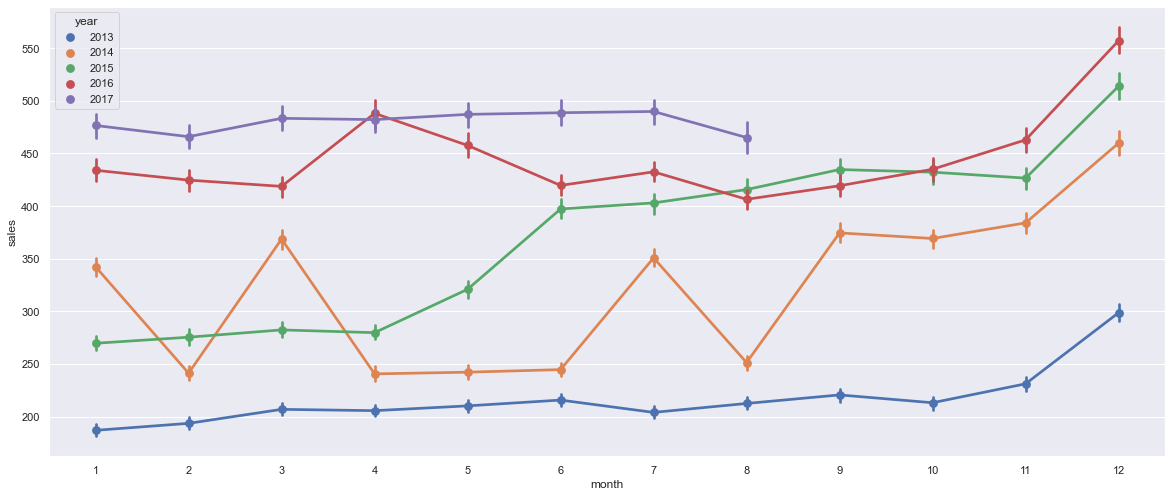

In [85]:
# Visualising the trend in sales per month for each year
sns.set(rc={'figure.figsize':(20,8.27)})
ax=sns.pointplot(x = 'month',y = 'sales',data = train1 ,hue = "year",)
ax

We make the following observations from the above plot:
1. There is an increase in sales every december, due to the holidays. 
2. In the year 2013, the sale is almost constat across all the months. 
3. In the year 2014, we observe that the sales have taken a dip in the month of Feb, April, May and June. Then there is an increase of sales in july, howevever the sales took a drip again in August and there is then increase in sales and a steady trend further. 
4. In the year 2015, in the initial months the sales have been lower than 2014. However, after june the sales have increased and follows a steady trend. 
5. In the year 2016, it is observed that there is a spike in sales in the month of April and March. A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. Due to which there has been an increase in sales. 
6. In the year 2017, we have the data available till the month of August and the sales are constant and higher than all other years. 

In [115]:
# Visualing popular products sold in december. 
DecData=train1.loc[train1['month'] == 12]
DecData=feature_eng(DecData)

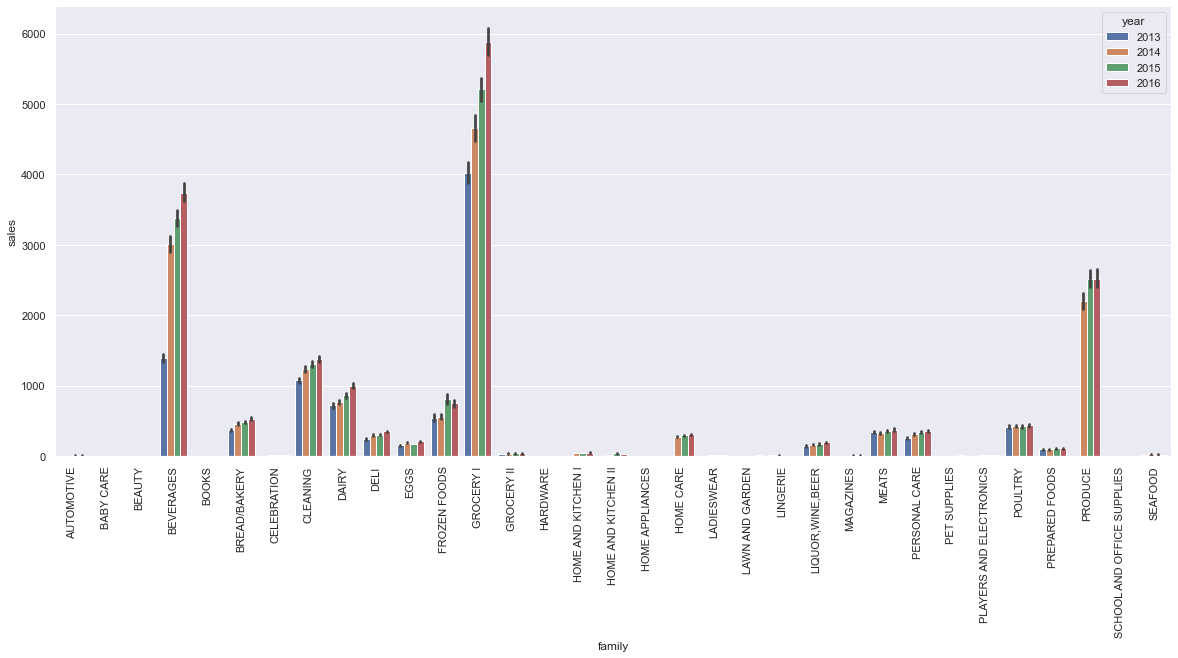

In [116]:
sns.set(rc={'figure.figsize':(20,8.27)})
ax=sns.barplot(x = 'family',y = 'sales',data = DecData, hue='year')
fig=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In each of the years, the highest sales are observed for Grocery 1, Beverages and Produce. We expected to observe spike in sales for other gifting items. However, the data does not depict that. It is most likely that the store focuses on groceries. And there an increase in sales of the grocaries as well, as the families all get together during the holiday season. 

In [117]:
# Visualing popular products sold in April 2016, During the earthquake. 
Apr2016=train1.loc[train1['month'] == 4]
Apr2016=Apr2016.loc[Apr2016['year'] == 2016]
Apr2016=feature_eng(Apr2016)

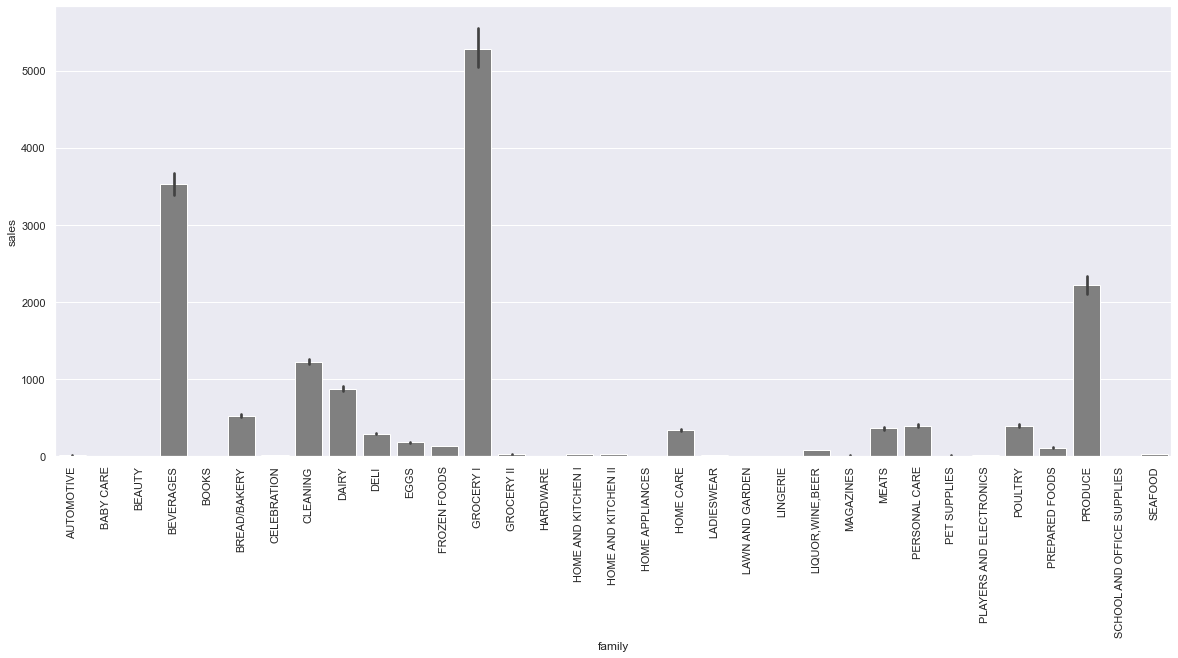

In [119]:
sns.set(rc={'figure.figsize':(20,8.27)})
ax=sns.barplot(x = 'family',y = 'sales',data = Apr2016, color='grey')
fig=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

We observed that there was a spike in sales in the month of April 2016. The essential items like Grocery, beverages and Produce were again the top sellers.

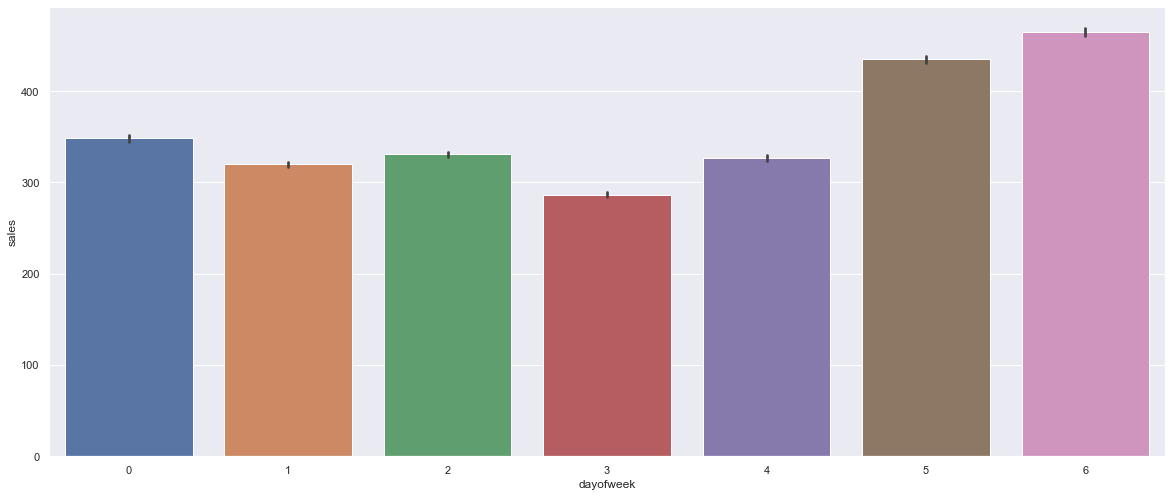

In [123]:
# Visualizing the total sales based on the day of the week. 
sns.set(rc={'figure.figsize':(20,8.27)})
ax=sns.barplot(x = 'dayofweek',y = 'sales',data = train1)

The sale is almost constant. There are fewer sales in the mid weeks, and compareitvely higher sales during the weekend. 


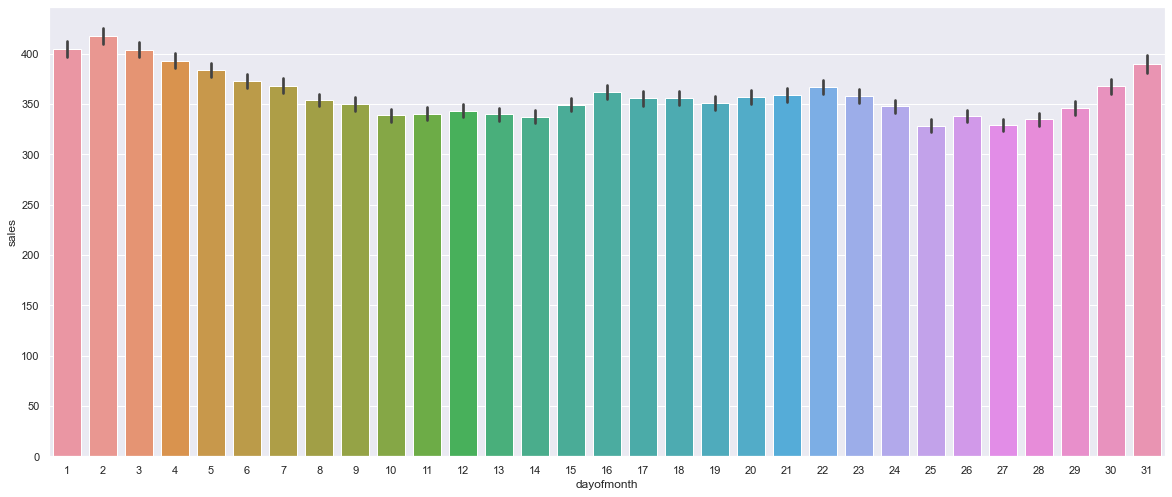

In [126]:
# Visualizing the total sales based on the day of the month. 
sns.set(rc={'figure.figsize':(20,8.27)})
ax=sns.barplot(x = 'dayofmonth',y = 'sales',data = train1)

The sales are quite steady, however we observe that the highest sales are the beginning of the month.

<AxesSubplot:xlabel='month', ylabel='dcoilwtico'>

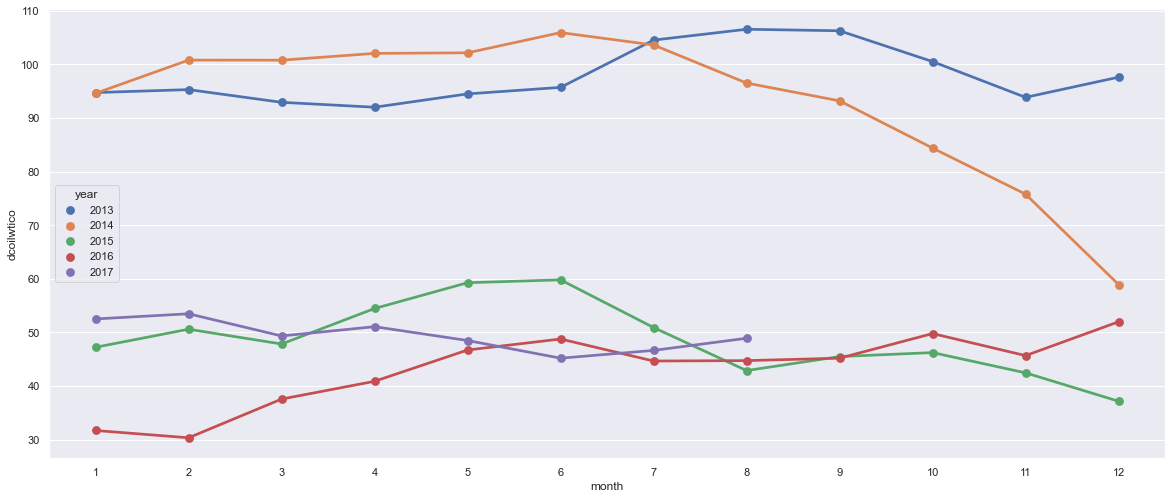

In [129]:
# Visualising oil data
sns.set(rc={'figure.figsize':(20,8.27)})
sns.pointplot(x = "month",y = 'dcoilwtico',data = train1,hue = "year")


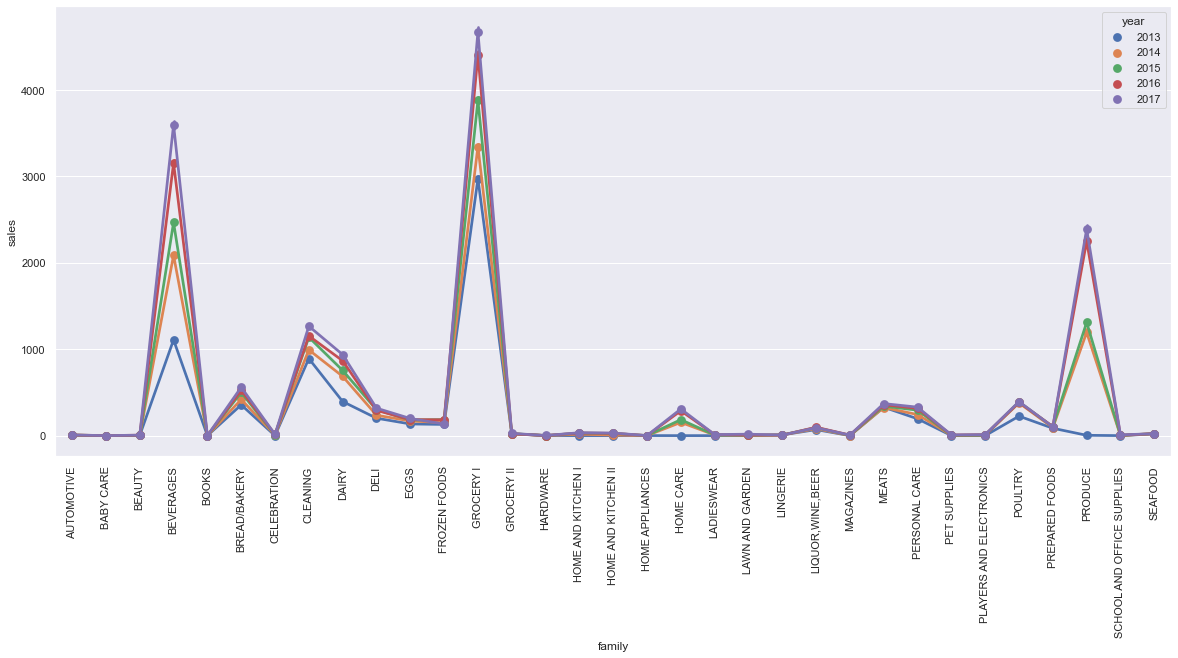

In [131]:
# Visualising sales based on family of products for each year
sns.set(rc={'figure.figsize':(20,8.27)})
ax=sns.pointplot(x = 'family',y = 'sales',data = train1 ,hue = "year")
fig=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

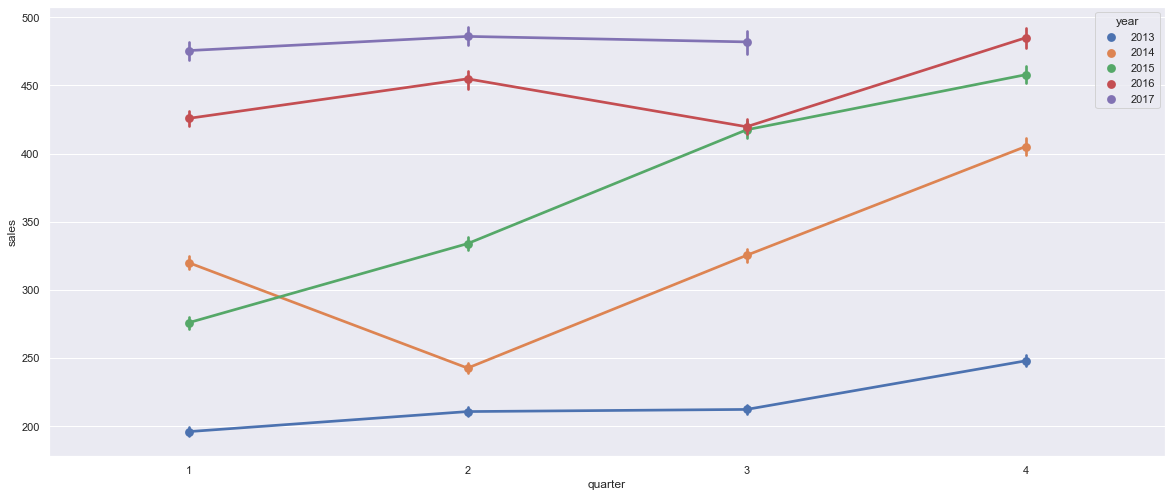

In [132]:
# Visualising Quaterly sales for each year
sns.set(rc={'figure.figsize':(20,8.27)})
ax=sns.pointplot(x = 'quarter',y = 'sales',data = train1 ,hue = "year")

### Visualisations based on stores

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

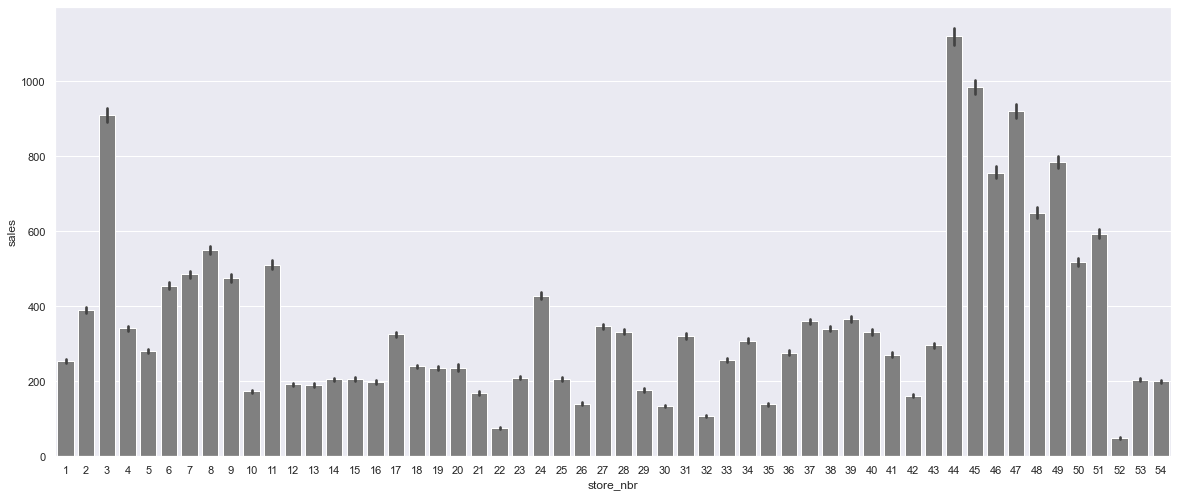

In [134]:
# Visualizing total sales based on store number 
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'sales',data = train1,color='grey')

Looking at the above plot is observed that,

1. Store 44 has the maximum number of sales.

In [40]:
# The stores that have highest sales.
stores[44:52]

,store_nbr,city,state,type,cluster
44,45,Quito,Pichincha,A,11
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
48,49,Quito,Pichincha,A,11
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11


Most of the stores that have maximum sales are in the Quito city, Pichincha state

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

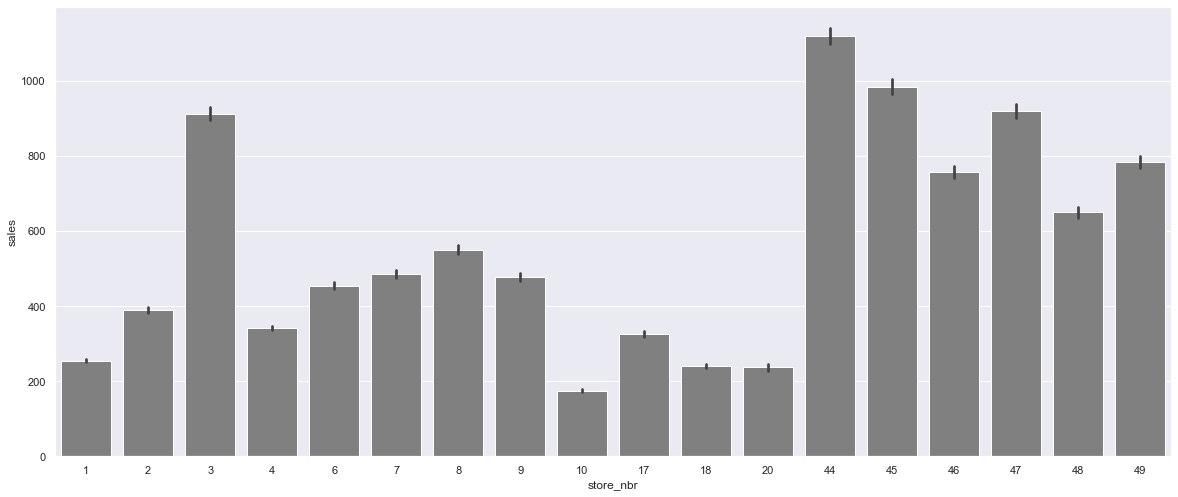

In [130]:
# Visualing sales in Quito city 
DecData=train1.loc[train1['month'] == 12]
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'sales',data = QuitoData, color='grey')

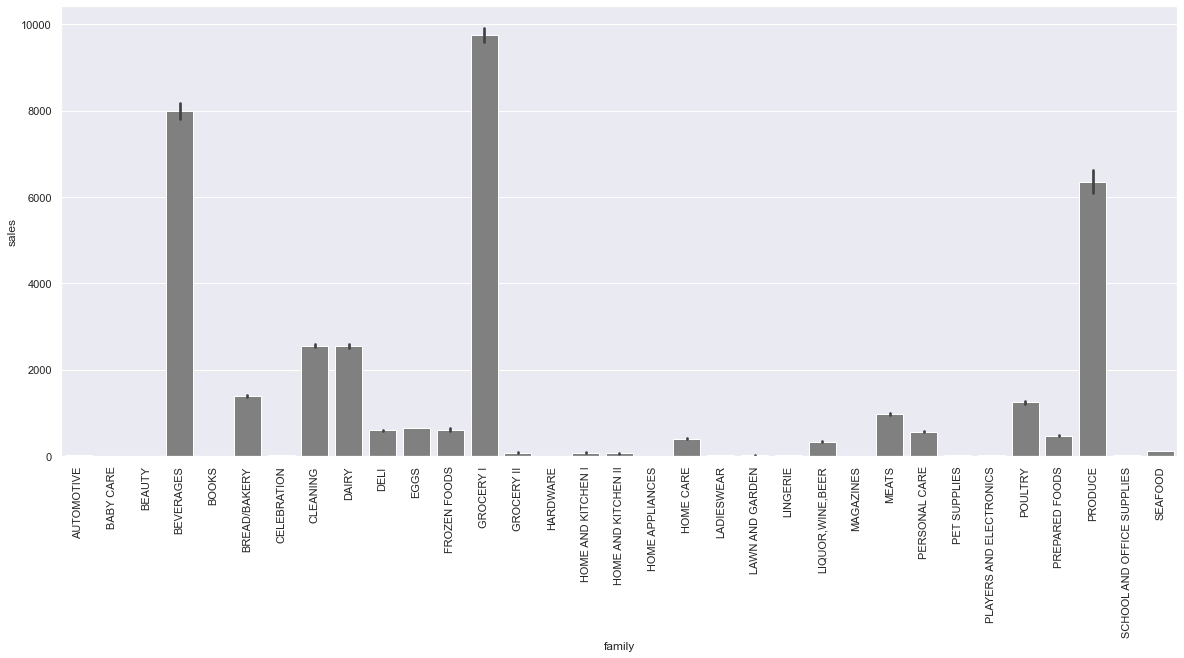

In [53]:
# Visualising the product family based sales in store 44.
store44=QuitoData.loc[QuitoData['store_nbr']==44]
sns.set(rc={'figure.figsize':(20,8.27)})
ax=sns.barplot(x = 'family',y = 'sales',data = store44 ,color = "grey")
fig=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

The highest selling products in store 44 are Grocery 1, Beverages and Produce

<AxesSubplot:xlabel='store_nbr', ylabel='transactions'>

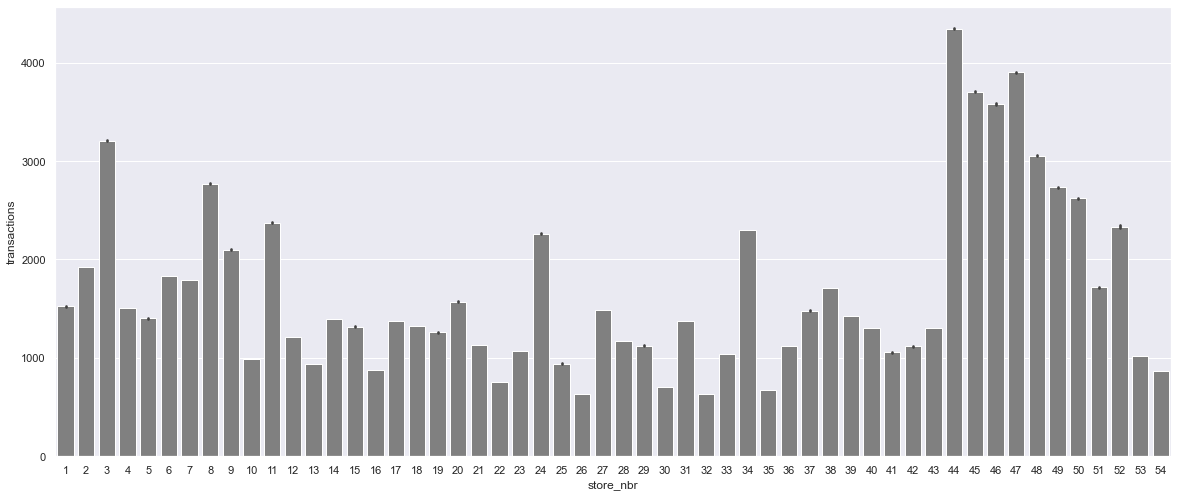

In [135]:
# Visualising stores with respect to number of transactions 
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'transactions',data = train1, color = "grey")

<AxesSubplot:xlabel='cluster', ylabel='transactions'>

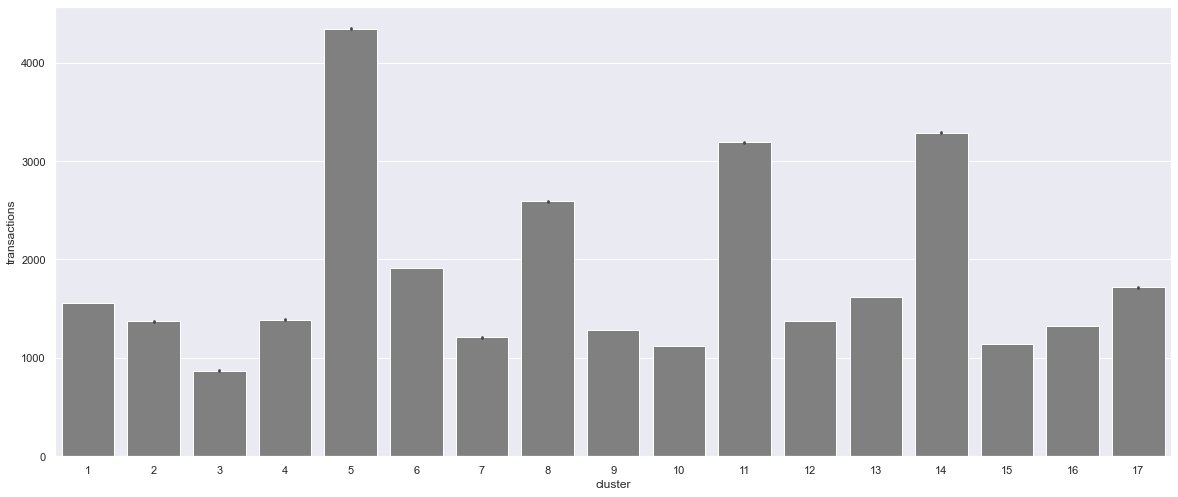

In [137]:
# Visualising clusters with respect to number of transactions 
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'cluster',y = 'transactions',data = train1, color = "grey")

<AxesSubplot:xlabel='cluster', ylabel='store_nbr'>

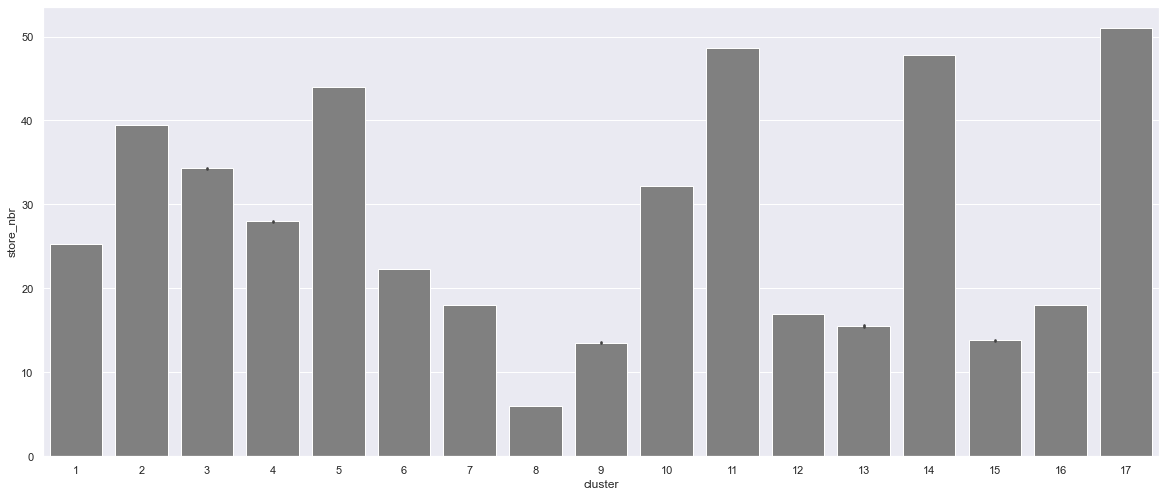

In [138]:
# Visualising clusters with store numbers
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'cluster',y = 'store_nbr',data = train1, color = "grey")